In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# input dataset
locations = pd.read_csv('/content/worldcities.csv')
locations.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


Text(0.5, 0.98, 'Location of all Cities')

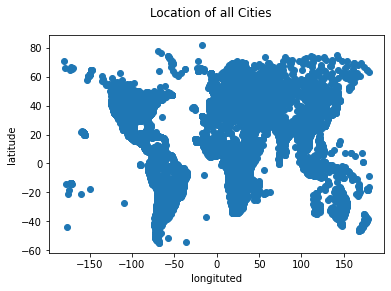

In [3]:
plt.scatter(locations["lng"], 
            locations["lat"])

plt.xlabel("longituted")
plt.ylabel("latitude")
plt.suptitle("Location of all Cities")

In [4]:
locations.isnull().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             31
iso3              0
admin_name       76
capital       18943
population      973
id                0
dtype: int64

In [5]:
columns = ["lat", "lng"]
locations = locations[columns]

In [6]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [7]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [8]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

NameError: ignored

In [ ]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

In [ ]:
locations["clusters"] = kmeans_model.labels_

locations.head()

In [ ]:
plt.scatter(locations["lng"], 
            locations["lat"], 
            c = locations["clusters"])